# House Pricing Prediction

### Problem Statement

   A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Steps that followed to provide solutions as follows

1. Reading, Understanding the data
2. Data Preparation
        a. Null Handling
        b. Oulier Handling
        c. Handling Derived Variable
        d. Data Processing
3. Model Building / Evaluation
4. Conclusion

# Step1: Reading, Understanding, Visualising the data

In [1]:
# Importing the Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score,mean_squared_error

from math import sqrt

In [2]:
# Reading the file

df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [3]:
# Shape of the dataframe

df.shape

(1460, 81)

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Analysing the format of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Listing the columns having the null values
df.isnull().sum()[(df.isnull().sum())>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Some columns have null values and need to handle those null values

# Step2: Data Preparation

In [7]:
# Dropping id column
df.drop('Id',axis=1, inplace=True)

### 2a. Null Handling

In [8]:
#Removing the columns with NULL values more than 90% of record
df.dropna(axis='columns', how='all',thresh = (df.shape[0]*0.2), inplace=True)

In [9]:
# Listing the columns having the null values
df.isnull().sum()[(df.isnull().sum())>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

On anlysing the variables with NULL values above, 80%  Missing or NULL value variables are dropped and the variable FireplaceQu is having more NULL values (nearly 40%) so dropping that column

In [10]:
# Dropping the column FireplaceQu having more NULL values
df.drop('FireplaceQu',axis=1, inplace=True)

In [11]:
# Listing the columns having the null values
df.isnull().sum()[(df.isnull().sum())>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [12]:
# Displaying the columns having NULL values to analyse the data
df[df.columns[df.isnull().any()].tolist()].head()

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA


Columns LotFrontage, MasVnrArea, GarageYrBlt are the numeric and having null values, so these null values need to be handled after analysing their ouliers.

In [13]:
#Analysing the numeric columns having NULL values
df[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [14]:
#Replacing the missing values by imputing columns with median because of outlier
df['LotFrontage']= df.LotFrontage.fillna(df.LotFrontage.median()) 
df['MasVnrArea']= df.MasVnrArea.fillna(df.MasVnrArea.median())

#Replacing the missing values by imputing columns with mean, since it has no outlier
df['GarageYrBlt']= df.GarageYrBlt.fillna(df.GarageYrBlt.mean())

In [15]:
# Listing the columns having the null values
df.isnull().sum()[(df.isnull().sum())>0]

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

All the above columns are having non-numberic and this can be either drop the null values or filling it with default value. If we fill it with default values then it will impact the further calculation, so these null values can be dropped

In [16]:
# Dropping rows for the Null values
df.dropna(axis='rows', inplace=True)

In [17]:
df.isnull().sum()[(df.isnull().sum())>0]

Series([], dtype: int64)

#### We have handled all the NULL values, now the dataframe doesn't have any NULL value

### 2b. Oulier Handling

In [18]:
#Checking for outlier in the numerical columns
df.describe(percentiles=[.25,.5,.75,.90,.95,.100])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,56.136024,70.438714,10706.294469,6.219731,5.596413,1973.029148,1985.668909,110.360239,464.234679,49.218236,582.494768,1095.947683,1176.221973,357.141256,4.221973,1537.585202,0.438714,0.060538,1.575486,0.402840,2.864723,1.029895,6.550075,0.648729,1978.596413,1.87145,501.449925,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,186761.782511
std,41.252576,22.170305,10336.621126,1.324472,1.078124,29.563540,20.296463,185.604816,458.792420,166.196584,439.950528,405.554435,386.644986,440.324982,40.712916,520.579960,0.515630,0.241685,0.547570,0.504185,0.776677,0.174697,1.585071,0.645393,24.773741,0.63428,186.761863,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,78913.847668
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.00000,160.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,35311.000000
10%,20.000000,49.700000,5088.900000,5.000000,5.000000,1926.000000,1950.000000,0.000000,0.000000,0.000000,98.100000,684.000000,768.000000,0.000000,0.000000,941.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1942.000000,1.00000,270.700000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,2006.000000,113000.000000
25%,20.000000,60.000000,7744.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,248.000000,819.750000,894.000000,0.000000,0.000000,1160.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.00000,377.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,69.000000,9600.000000,6.000000,5.000000,1976.000000,1994.500000,0.000000,413.000000,0.000000,489.000000,1021.500000,1098.000000,0.000000,0.000000,1480.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.00000,484.000000,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,2008.000000,168500.000000
75%,70.000000,80.000000,11760.750000,7.000000,6.000000,2001.000000,2004.000000,174.000000,733.000000,0.000000,815.750000,1324.000000,1414.000000,740.500000,0.000000,1791.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.00000,583.000000,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,2009.000000,220000.000000
90%,120.000000,93.000000,14575.900000,8.000000,7.000000,2006.000000,2007.000000,340.000000,1079.900000,134.100000,1242.700000,1616.300000,1686.300000,975.600000,0.000000,2175.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.00000,772.600000,264.300000,130.000000,109.200000,0.000000,0.00000,0.000000,0.000000,10.000000,2010.000000,283624.100000
95%,160.000000,105.000000,17508.850000,8.000000,8.000000,2007.000000,2007.000000,464.300000,1280.300000,412.350000,1480.300000,1754.500000,1838.15000

In [19]:
def plotcolumn (column, column_name):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.boxplot(column, color = 'lightblue')
    plt.title(column_name + ' Analysis',fontsize=16, fontweight='bold')
    plt.xlabel(column_name, fontsize= 14, fontstyle='italic', fontweight='bold')
    plt.ylabel(column_name + ' Counts', fontsize= 14, fontstyle='italic', fontweight='bold')

    plt.subplot(1, 2, 2)
    sns.distplot(df.MSSubClass , hist= True ,color="b")
    plt.title(column_name + ' Analysis',fontsize=16, fontweight='bold')
    plt.xlabel(column_name, fontsize= 14, fontstyle='italic', fontweight='bold')
    plt.ylabel(column_name + ' Counts', fontsize= 14, fontstyle='italic', fontweight='bold')
    plt.grid(True)

    plt.show()

In [20]:
def outlier_range (data_frame, column):
    Q1=column.quantile(0.25)
    Q3=column.quantile(0.75)
    IQR = (Q3-Q1).round(2)
    lower_fence = (Q1 - (1.5*IQR)).round(2)
    upper_fence = (Q3 + (1.5*IQR)).round(2)

    print("Q1 is",Q1,"\nQ3 is",Q3,"\nIQR is",IQR,"\nLOWER_FENCE is",lower_fence,"\nUPPER_FENCE is",upper_fence)
    cnt = data_frame[((column > upper_fence) | (column < lower_fence))].shape[0]
    per = round((data_frame[((column > upper_fence) | (column < lower_fence))].shape[0])/data_frame.shape[0]*100,2)
    print('Count of Records which beyond Upper and Lower Fences is',cnt)
    print('Percentage of Records which beyond Upper and Lower Fences is',per,'%')
    
def drop_outlier(data_frame, column):
    Q1=column.quantile(0.25)
    Q3=column.quantile(0.75)
    IQR = (Q3-Q1).round(2)
    lower_fence = (Q1 - (1.5*IQR)).round(2)
    upper_fence = (Q3 + (1.5*IQR)).round(2)
    return(data_frame[~((column > upper_fence) | (column < lower_fence))])

### 2b. i) Identifying & Treating Outliers in LotArea variable

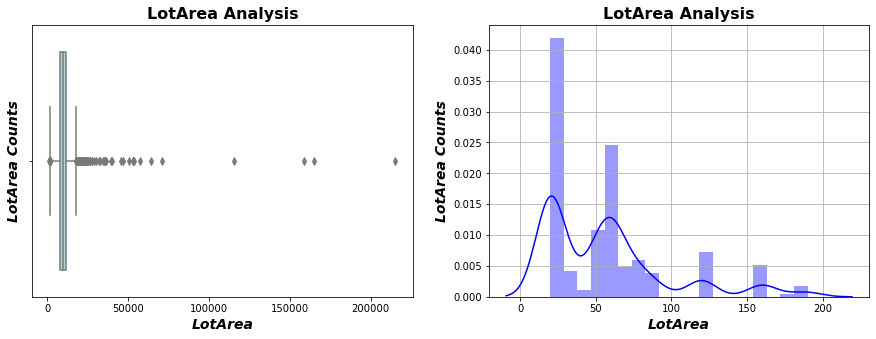



Q1 is 7744.0 
Q3 is 11760.75 
IQR is 4016.75 
LOWER_FENCE is 1718.88 
UPPER_FENCE is 17785.88
Count of Records which beyond Upper and Lower Fences is 76
Percentage of Records which beyond Upper and Lower Fences is 5.68 %


Shape before dropping outliers (1338, 75)
Shape after dropping outliers (1262, 75)




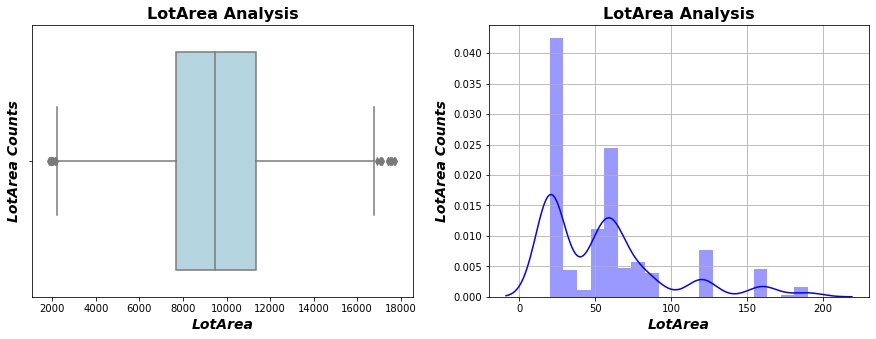

In [21]:
#boxplot for identifying outliers in the variable
plotcolumn (df.LotArea, 'LotArea')

# Calculating the outliers ranges
print('\n')
outlier_range (df, df.LotArea)

#Shape before dropping outliers
print('\n')
print('Shape before dropping outliers', df.shape)

# Drop outlier
df = drop_outlier(df, df.LotArea)

#Shape after dropping outliers
print('Shape after dropping outliers', df.shape)

#boxplot for identifying outliers in the variable
print('\n')
plotcolumn (df.LotArea, 'LotArea')

In [22]:
#Checking for outlier in the numerical columns
df.describe(percentiles=[.25,.5,.75,.90,.95,.100])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000
mean,55.138669,69.916799,9461.579239,6.221078,5.594295,1973.401743,1985.911252,106.154517,451.961965,46.526149,587.897781,1086.385895,1165.341521,347.304279,3.712361,1516.358162,0.427100,0.058637,1.572108,0.395404,2.862916,1.030111,6.522979,0.627575,1978.914422,1.864501,497.719493,95.874802,46.477021,21.174326,3.191759,15.998415,1.820919,37.546751,6.343106,2007.809033,184702.080824
std,40.116313,18.659227,3131.066250,1.309793,1.065752,29.716388,20.338961,176.948320,427.678550,158.984751,441.402823,371.147409,360.552708,431.103735,37.165026,479.476669,0.504377,0.238387,0.539435,0.501934,0.761528,0.175538,1.538518,0.631552,24.919836,0.632098,181.454133,121.856588,62.392422,59.303288,29.039441,56.740278,32.413877,467.713744,2.693493,1.328328,74898.375839
min,20.000000,21.000000,1869.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
10%,20.000000,50.000000,5306.400000,5.000000,5.000000,1926.000000,1950.000000,0.000000,0.000000,0.000000,103.100000,689.000000,773.000000,0.000000,0.000000,936.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1941.000000,1.000000,270.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,114553.600000
25%,20.000000,60.000000,7682.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,254.250000,824.250000,894.000000,0.000000,0.000000,1154.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,373.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,69.000000,9491.000000,6.000000,5.000000,1976.000000,1995.000000,0.000000,406.500000,0.000000,493.000000,1012.000000,1095.000000,0.000000,0.000000,1472.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1981.000000,2.000000,484.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167000.000000
75%,70.000000,79.000000,11344.750000,7.000000,6.000000,2002.000000,2004.000000,170.000000,727.000000,0.000000,815.750000,1304.000000,1389.750000,733.500000,0.000000,1772.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,578.000000,168.750000,68.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215150.000000
90%,120.000000,91.000000,13513.600000,8.000000,7.000000,2006.000000,2007.000000,335.900000,1055.700000,122.800000,1258.000000,1599.500000,1663.700000,938.700000,0.000000,2131.500000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.000000,1.000000,2006.000000,3.000000,758.000000,255.900000,128.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,280000.000000
95%,160.000000,100.950000,14777.800000,8.000000,8.000000,2007.000000,2007.000000,449.900000,1259.900000,391.000000,1489.000000,1733.

### 2b. ii) Identifying & Treating Outliers in GrLivArea variable

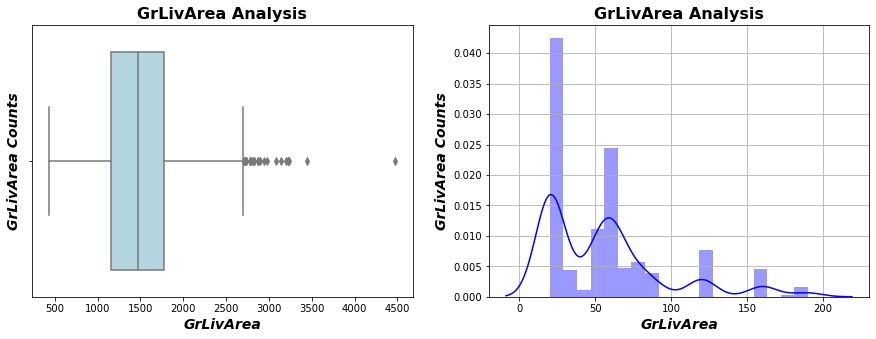



Q1 is 1154.25 
Q3 is 1772.5 
IQR is 618.25 
LOWER_FENCE is 226.88 
UPPER_FENCE is 2699.88
Count of Records which beyond Upper and Lower Fences is 26
Percentage of Records which beyond Upper and Lower Fences is 2.06 %


Shape before dropping outliers (1262, 75)
Shape after dropping outliers (1236, 75)




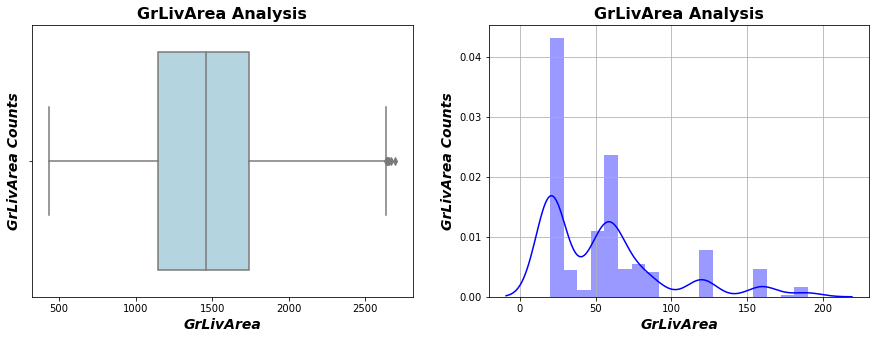

In [23]:
#boxplot for identifying outliers in the variable
plotcolumn (df.GrLivArea, 'GrLivArea')

# Calculating the outliers ranges
print('\n')
outlier_range (df, df.GrLivArea)

#Shape before dropping outliers
print('\n')
print('Shape before dropping outliers', df.shape)

# Drop outlier
df = drop_outlier(df, df.GrLivArea)

#Shape after dropping outliers
print('Shape after dropping outliers', df.shape)

#boxplot for identifying outliers in the variable
print('\n')
plotcolumn (df.GrLivArea, 'GrLivArea')

In [24]:
#Checking for outlier in the numerical columns
df.describe(percentiles=[.25,.5,.75,.90,.95,.100])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000
mean,55.060680,69.601942,9386.826861,6.182848,5.588188,1973.362460,1985.737055,102.813107,447.714401,45.544498,583.949029,1077.207929,1151.643204,330.316343,3.469256,1485.428803,0.425566,0.059061,1.553398,0.386731,2.839806,1.030744,6.445793,0.610032,1978.822816,1.852751,493.553398,94.450647,44.979773,21.050162,3.258900,15.435275,0.990291,35.788026,6.338188,2007.807443,180772.411812
std,40.482619,18.309400,3104.262999,1.287334,1.053772,29.667273,20.425862,172.600721,423.664956,154.506351,436.890870,361.397227,345.301464,414.628055,35.843224,430.771028,0.504355,0.239244,0.524289,0.500318,0.745449,0.177321,1.449101,0.620849,24.942009,0.629376,179.252789,120.714278,59.005211,58.977748,29.339796,54.195685,24.650888,468.199297,2.700523,1.331089,68373.428280
min,20.000000,21.000000,1869.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
10%,20.000000,50.000000,5175.500000,5.000000,5.000000,1926.000000,1950.000000,0.000000,0.000000,0.000000,102.500000,687.500000,769.500000,0.000000,0.000000,933.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1941.000000,1.000000,270.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,113750.000000
25%,20.000000,60.000000,7594.500000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,253.750000,817.750000,893.750000,0.000000,0.000000,1147.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,364.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,134900.000000
50%,50.000000,69.000000,9375.000000,6.000000,5.000000,1976.000000,1995.000000,0.000000,403.000000,0.000000,490.000000,1008.000000,1087.000000,0.000000,0.000000,1461.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1981.000000,2.000000,482.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,70.000000,79.000000,11278.000000,7.000000,6.000000,2002.000000,2004.000000,168.000000,719.250000,0.000000,811.500000,1284.500000,1362.250000,725.500000,0.000000,1742.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213000.000000
90%,120.000000,90.000000,13348.000000,8.000000,7.000000,2006.000000,2006.500000,320.000000,1039.500000,122.000000,1254.500000,1584.000000,1651.500000,901.500000,0.000000,2079.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.000000,1.000000,2006.000000,3.000000,752.500000,252.000000,127.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,271450.000000
95%,160.000000,100.000000,14585.500000,8.000000,8.000000,2007.000000,2007.000000,442.000000,1247.500000,382.750000,1480.500000,1728.

### 2b. iii) Identifying & Treating Outliers in LotFrontage variable

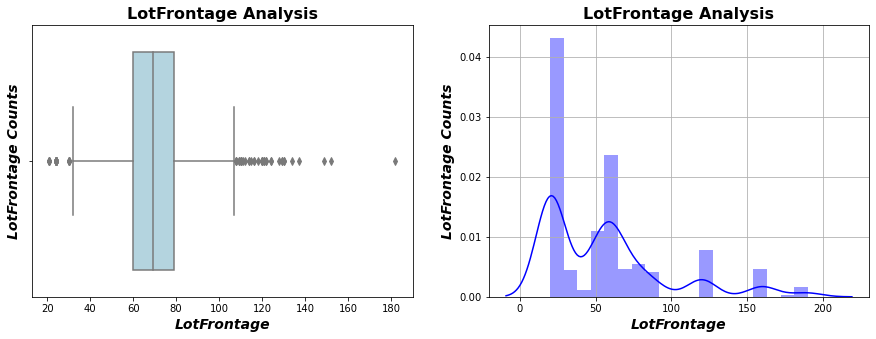



Q1 is 60.0 
Q3 is 79.0 
IQR is 19.0 
LOWER_FENCE is 31.5 
UPPER_FENCE is 107.5
Count of Records which beyond Upper and Lower Fences is 69
Percentage of Records which beyond Upper and Lower Fences is 5.58 %


Shape before dropping outliers (1236, 75)
Shape after dropping outliers (1167, 75)




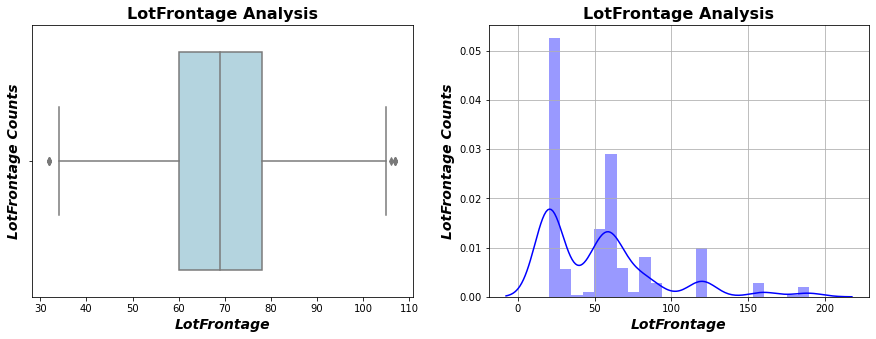

In [25]:
#boxplot for identifying outliers in the variable
plotcolumn (df.LotFrontage, 'LotFrontage')

# Calculating the outliers ranges
print('\n')
outlier_range (df, df.LotFrontage)

#Shape before dropping outliers
print('\n')
print('Shape before dropping outliers', df.shape)

# Drop outlier
df = drop_outlier(df, df.LotFrontage)

#Shape after dropping outliers
print('Shape after dropping outliers', df.shape)

#boxplot for identifying outliers in the variable
print('\n')
plotcolumn (df.LotFrontage, 'LotFrontage')

In [26]:
#Checking for outlier in the numerical columns
df.describe(percentiles=[.25,.5,.75,.90,.95,.100])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.00000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000
mean,53.209083,68.945159,9415.469580,6.154242,5.605827,1972.664096,1985.419880,100.909169,450.699229,44.928021,582.402742,1078.029991,1154.347901,323.649529,3.468723,1481.466153,0.430163,0.060840,1.543273,0.373608,2.843188,1.032562,6.443873,0.605827,1978.360754,1.83976,490.934876,94.062554,44.633248,21.752356,3.312768,15.688946,1.048843,37.904027,6.356470,2007.808055,180096.293916
std,38.022596,14.340998,2881.318133,1.278613,1.061844,29.838104,20.582601,171.571798,421.841948,151.786779,433.593094,357.450521,338.943696,414.109427,36.674412,430.726984,0.505593,0.242698,0.523516,0.497944,0.751387,0.182330,1.448390,0.617554,25.119733,0.63017,177.921136,119.354325,58.862787,59.694444,29.825002,54.813797,25.368573,481.770133,2.721761,1.328860,67350.831207
min,20.000000,32.000000,1974.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.00000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
10%,20.000000,50.000000,5758.400000,5.000000,5.000000,1925.000000,1950.000000,0.000000,0.000000,0.000000,105.000000,694.600000,780.000000,0.000000,0.000000,926.800000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1941.000000,1.00000,264.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,114502.400000
25%,20.000000,60.000000,7734.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,254.000000,832.000000,896.500000,0.000000,0.000000,1143.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.00000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,134850.000000
50%,50.000000,69.000000,9364.000000,6.000000,5.000000,1976.000000,1995.000000,0.000000,410.000000,0.000000,490.000000,1010.000000,1090.000000,0.000000,0.000000,1458.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.00000,483.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,60.000000,78.000000,11203.500000,7.000000,6.000000,2001.000000,2004.000000,166.000000,728.000000,0.000000,811.000000,1276.000000,1359.000000,720.000000,0.000000,1741.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.00000,576.000000,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212000.000000
90%,120.000000,88.000000,13039.800000,8.000000,7.000000,2006.000000,2007.000000,318.000000,1039.400000,123.800000,1238.200000,1584.000000,1648.600000,901.400000,0.000000,2066.400000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.000000,1.000000,2006.000000,3.00000,748.400000,250.000000,124.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,270000.000000
95%,120.000000,94.000000,14290.100000,8.000000,8.000000,2007.000000,2007.000000,437.400000,1237.700000,376.400000,1465.300000,1724.800000,174

#### No major outliers observed

### 2c Handling Derived Variable

In [27]:
# Handling year column
df['garage_age'] = pd.datetime.now().year - df['GarageYrBlt']
df['remod_age'] = pd.datetime.now().year - df['YearRemodAdd']
df['current_age'] = pd.datetime.now().year - df['YearBuilt']
df['selling_age'] = df['YrSold'] - df['YearBuilt']

#dropping old columns
Rem_cols = ['YearBuilt','YearRemodAdd', 'MoSold', 'YrSold']
df.drop(Rem_cols,axis=1, inplace=True)

In [28]:
#Checking for outlier in the numerical columns
df.describe(percentiles=[.25,.5,.75,.90,.95,.100])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,garage_age,remod_age,current_age,selling_age
count,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.00000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000
mean,53.209083,68.945159,9415.469580,6.154242,5.605827,100.909169,450.699229,44.928021,582.402742,1078.029991,1154.347901,323.649529,3.468723,1481.466153,0.430163,0.060840,1.543273,0.373608,2.843188,1.032562,6.443873,0.605827,1978.360754,1.83976,490.934876,94.062554,44.633248,21.752356,3.312768,15.688946,1.048843,37.904027,180096.293916,43.639246,36.580120,49.335904,35.143959
std,38.022596,14.340998,2881.318133,1.278613,1.061844,171.571798,421.841948,151.786779,433.593094,357.450521,338.943696,414.109427,36.674412,430.726984,0.505593,0.242698,0.523516,0.497944,0.751387,0.182330,1.448390,0.617554,25.119733,0.63017,177.921136,119.354325,58.862787,59.694444,29.825002,54.813797,25.368573,481.770133,67350.831207,25.119733,20.582601,29.838104,29.862260
min,20.000000,32.000000,1974.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.00000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35311.000000,12.000000,12.000000,12.000000,0.000000
10%,20.000000,50.000000,5758.400000,5.000000,5.000000,0.000000,0.000000,0.000000,105.000000,694.600000,780.000000,0.000000,0.000000,926.800000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1941.000000,1.00000,264.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,114502.400000,16.000000,15.000000,16.000000,1.000000
25%,20.000000,60.000000,7734.000000,5.000000,5.000000,0.000000,0.000000,0.000000,254.000000,832.000000,896.500000,0.000000,0.000000,1143.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.00000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134850.000000,20.000000,18.000000,21.000000,7.000000
50%,50.000000,69.000000,9364.000000,6.000000,5.000000,0.000000,410.000000,0.000000,490.000000,1010.000000,1090.000000,0.000000,0.000000,1458.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.00000,483.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,165000.000000,42.000000,27.000000,46.000000,33.000000
75%,60.000000,78.000000,11203.500000,7.000000,6.000000,166.000000,728.000000,0.000000,811.000000,1276.000000,1359.000000,720.000000,0.000000,1741.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.00000,576.000000,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,212000.000000,61.000000,55.000000,68.000000,53.000000
90%,120.000000,88.000000,13039.800000,8.000000,7.000000,318.000000,1039.400000,123.800000,1238.200000,1584.000000,1648.600000,901.400000,0.000000,2066.400000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.000000,1.000000,2006.000000,3.00000,748.400000,250.000000,124.000000,112.000000,0.000000,0.000000,0.000000,0.000000,270000.000000,81.000000,72.000000,97.000000,82.000000
95%,120.000000,94.000000,14290.100000,8.000000,8.000000,437.400000,1237.700000,376.400000,1465.300000,1724.800000,1744.800000,1062.100000,0.000000,2289.100000,1.000000,1.

#### No major outliers observed

In [29]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,garage_age,remod_age,current_age,selling_age
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,19.0,19,19,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,46.0,46,46,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,21.0,20,21,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,24.0,52,107,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,22.0,22,22,8


#### Analysing the data

In [30]:
#checking uniqueness of the columns
types = df.dtypes
string_type = types[(types == 'object')] 
string_col = list(string_type.index)
print(string_col)
print('\n')
for col in string_col:
    print(col,':')
    print(df[col].value_counts())
    print('\n')

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


MSZoning :
RL         938
RM         159
FV          52
RH          11
C (all)      7
Name: MSZoning, dtype: int64


Street :
Pave    1166
Grvl       1
Name: Street, dtype: int64


LotShape :
Reg    737
IR1    405
IR2     22
IR3      3
Name: LotShape, dtype: int64


LandContour :
Lvl    1073
Bnk      42
HLS      37
Low      15
Name: LandContour, dtype: int64


Utilities :
AllPub    1166
NoSeWa       1
Name: Utilities, dtype: int64


LotConfig :
Inside     853
Corner     2

In [31]:
#Removing the column with unique values
Rem_cols = ['Street','Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating','Functional', 'GarageCond']
df.drop(Rem_cols,axis=1, inplace=True)
print(df.shape)
df.head()

(1167, 67)


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,garage_age,remod_age,current_age,selling_age
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,19.0,19,19,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,46.0,46,46,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,21.0,20,21,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,24.0,52,107,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,22.0,22,22,8


In [32]:
#type of each feature in data: int, float, object
types = df.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

#Numerical columns
num_col = list(numeric_type.index)
print('Numerical Col:\n\n',num_col,'\n')

#Categorical columns
cat_col = list(categorical_type.index)
print('Categorical Col:\n\n',cat_col)

Numerical Col:

 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'garage_age', 'remod_age', 'current_age', 'selling_age'] 

Categorical Col:

 ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition']


In [33]:
def boxplotter(col):
    for i,c in enumerate(col,1):
        ax=plt.subplot(25,2,i)
        plt.xticks(rotation=90)
        sns.boxplot(x = c, y ='SalePrice', data = df,ax=ax)

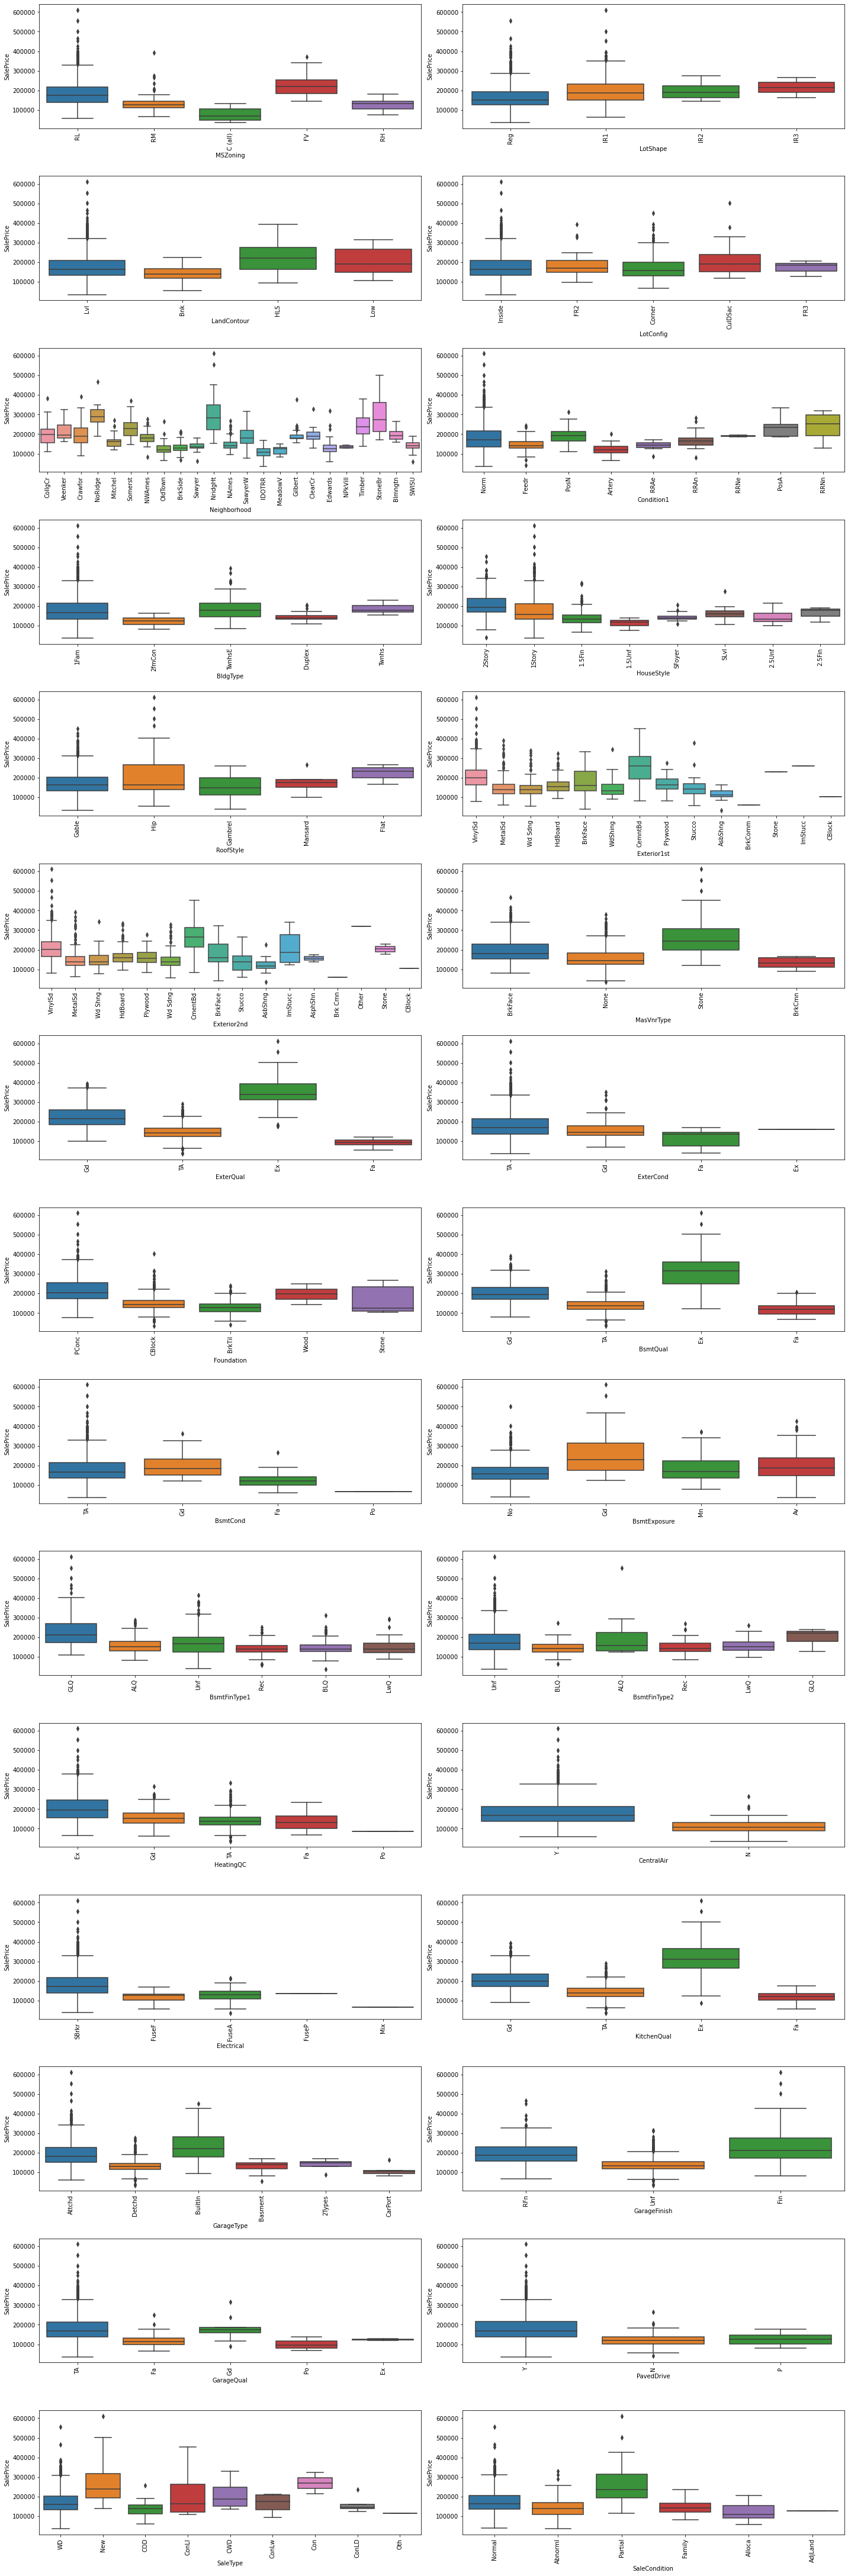

In [34]:
#Plotting boxplots
plt.figure(figsize=(20,100))
boxplotter(cat_col)
plt.tight_layout()
plt.show()

Below are the observations:
- Poured Contrete foundation are the highest in number
- Unfinished Garage has little higher sales count
- Majority of ExterQual, ExerCond is TA
- Price of Poured Contrete Foundation is highest
- Average Quality Garage has more sales count
- Price of Excellent ExterQual and HeatingQc is highest
- Houses with no Masonry veneer has more sales record
- Garage type has more sales count
- Warranty Deed Sales are higher


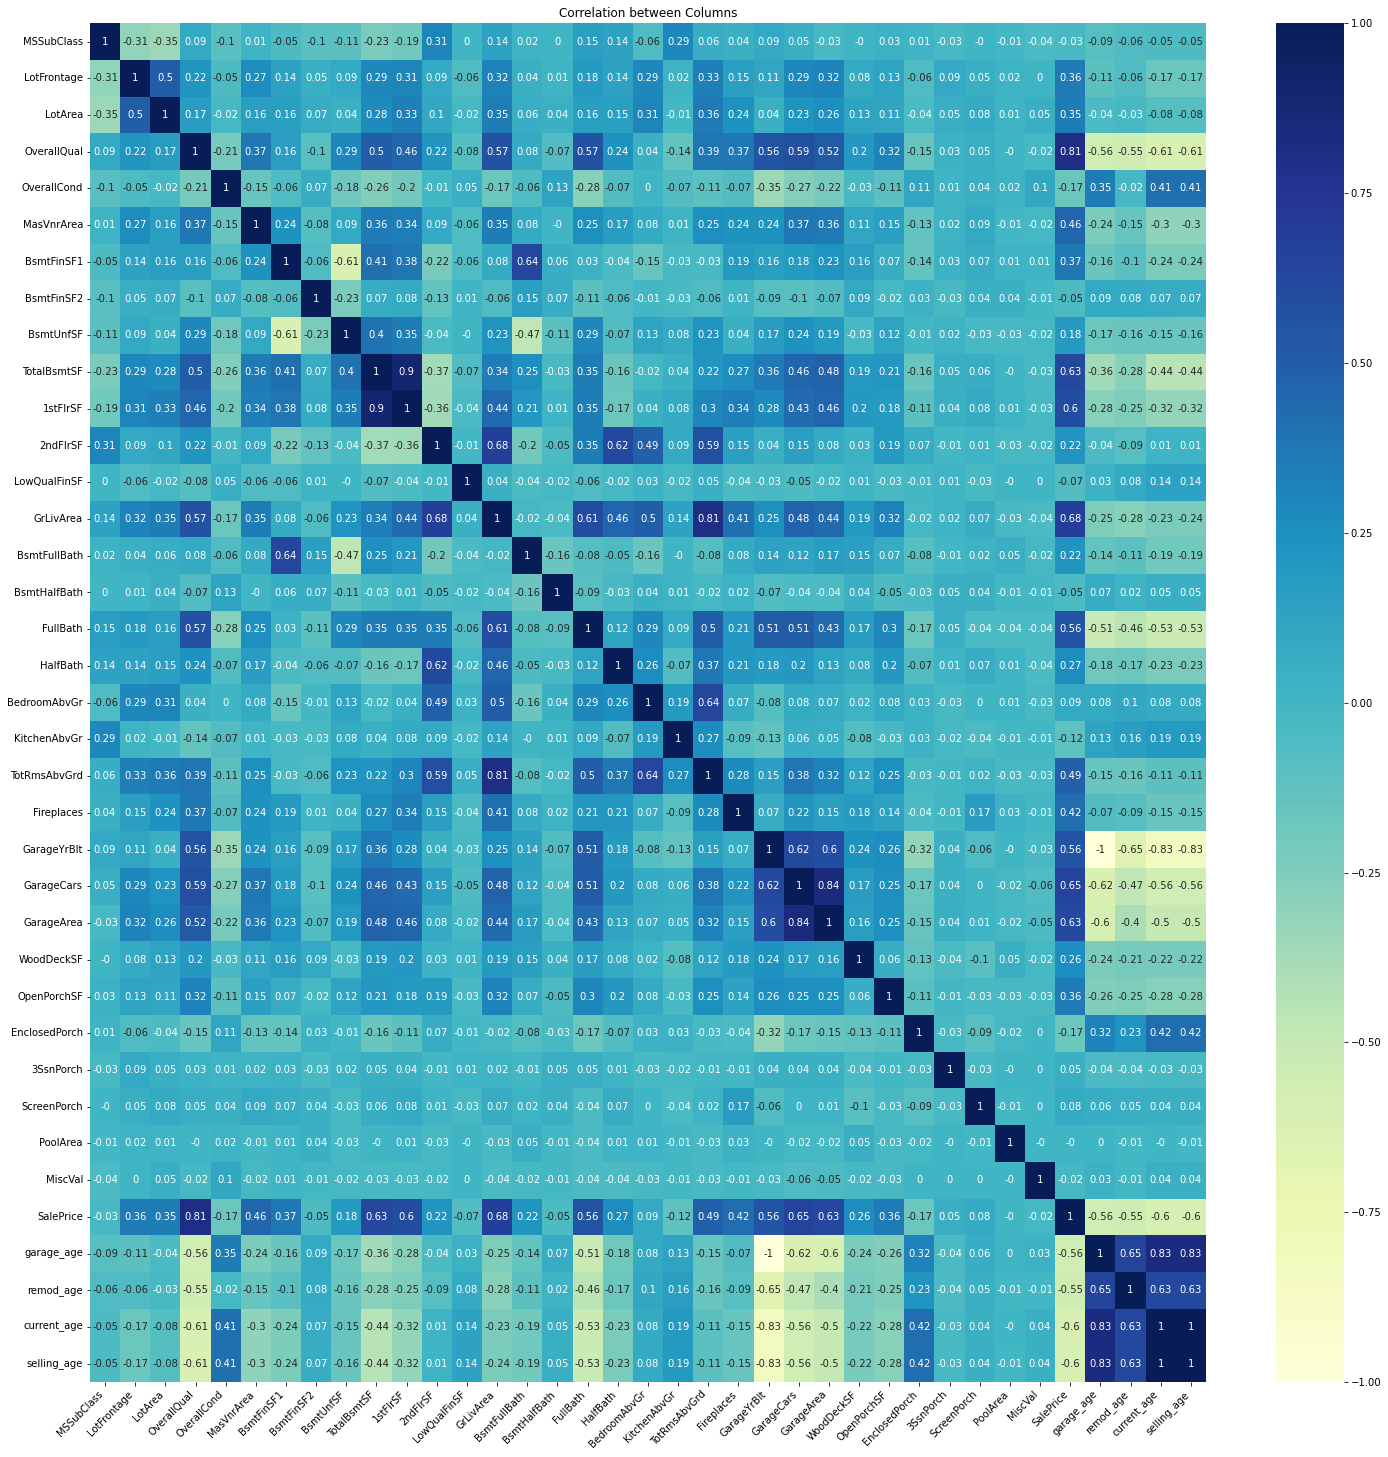

In [35]:
#Finding correlation matrix
corr = df.corr().round(2)
plt.figure(figsize=(25,25))
#plotting heatmap
ax = sns.heatmap(corr, annot = True, cmap='YlGnBu')
top, bottom = ax.get_ylim()
ax.set_ylim(top, bottom)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Correlation between Columns")
plt.show()

Below are the observations
- Derived variable selling age and other ages are negatively correlated with sale price, indicating increase in age reduces the pruce
- Overalqual is the highest correlated variable with saleprice
- Total basement, 1st floor, fullbath, garage finish are also highly correlated with saleprice
- Few multicollinearity found

In [36]:
#filtering out highly correlated features (more than 0.5 correlation) with dependent variable
corr_features = corr[abs(corr['SalePrice']) > 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_features[1:])
corr_cols = [i for i in corr_features.index]

OverallQual    0.81
GrLivArea      0.68
GarageCars     0.65
TotalBsmtSF    0.63
GarageArea     0.63
1stFlrSF       0.60
FullBath       0.56
GarageYrBlt    0.56
remod_age     -0.55
garage_age    -0.56
current_age   -0.60
selling_age   -0.60
Name: SalePrice, dtype: float64


<Figure size 4320x4320 with 0 Axes>

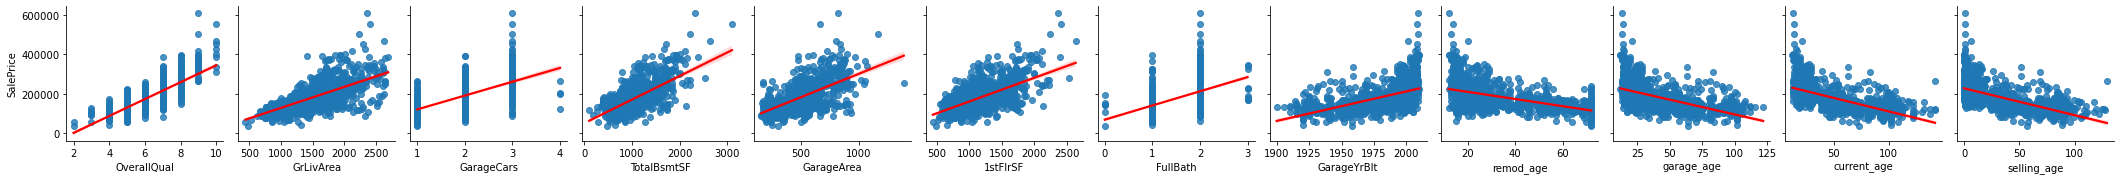

In [37]:
# Analysing the highly correlated columns
plt.figure(figsize = (60,60))

sns.pairplot(data=df,x_vars=corr_cols[1:],y_vars=corr_cols[0], kind ='reg',plot_kws={'line_kws':{'color':'red'}})
plt.show()

 ### 2d. Data Processing

#### Creating Dummy Variables for Categorical Columns

In [38]:
#creating dummy variables for all categorical columns
dummies = pd.get_dummies(df[cat_col], drop_first = True)

# Add the results to the original housing dataframe
df = pd.concat([df, dummies], axis = 1)

#dropping the orginal columns since we created dummies
df.drop(cat_col, axis = 1, inplace = True)

df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,garage_age,remod_age,current_age,selling_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,208500,19.0,19,19,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,181500,46.0,46,46,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,17

In [39]:
#The shape of final dataset
df.shape

(1167, 194)

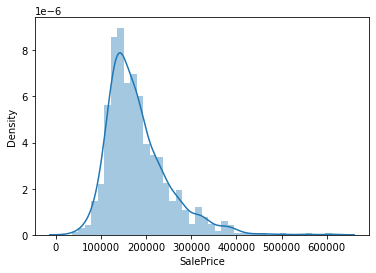

In [40]:
#The Target Variable
sns.distplot(df['SalePrice'])
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

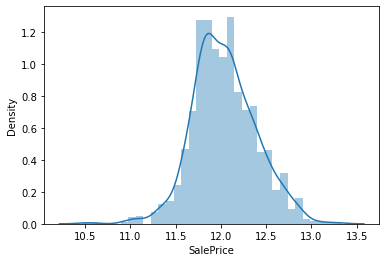

In [41]:
#Log Transformation
df['SalePrice']=np.log1p(df['SalePrice'])

#Looking at the Target Variable after transformation
sns.distplot(df['SalePrice'])

In [42]:
df_train, df_test = train_test_split(df, train_size=0.8, random_state=100)
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,garage_age,remod_age,current_age,selling_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
189,120,41.0,4923,8,5,0.0,1153,0,440,1593,1593,0,0,1593,1,0,1,1,0,1,5,1,2001.0,2,682,0,120,0,0,224,0,0,12.563751,21.0,20,21,7,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
799,50,60.0,7200,5,7,252.0,569,0,162,731,981,787,0,1768,1,0,1,1,3,1,7,2,1939.0,1,240,0,0,264,0,0,0,0,12.072547,83.0,72,85,70,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
256,60,64.0,8791,6,5,0.0,503,0,361,86

In [43]:
#scaling using standard scaler
scaler = StandardScaler()

#scaling training dataset
df_train[num_col] = scaler.fit_transform(df_train[num_col])

#scaling test dataset (Only transform will be used for test dataset)
df_test[num_col] = scaler.transform(df_test[num_col])

#looking at the data after scaling
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,garage_age,remod_age,current_age,selling_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
189,1.810380,-1.949006,-1.552015,1.466421,-0.567409,-0.591006,1.657693,-0.299289,-0.327596,1.437153,1.314300,-0.775897,-0.090065,0.273626,1.139765,-0.250448,-1.015417,1.234730,-3.849697,-0.162985,-0.969574,0.642661,0.899667,0.271387,1.079487,-0.764969,1.247743,-0.366034,-0.117087,3.634276,-0.032756,-0.072886,1.498736,-0.899667,-0.797827,-0.942662,-0.936291,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
799,-0.054540,-0.623269,-0.760605,-0.904759,1.316550,0.858722,0.278406,-0.299289,-0.967883,-0.978747,-0.501665,1.126500,-0.090065,0.676089,1.139765,-0.250448,-1.015417,1.234730,0.238050,-0.162985,0.416805,2.263210,-1.560953,-1.301309,-1.380832

In [44]:
#seperating target and independent features
# Creating X and y
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

# Step3: Model Building / Evaluation

In [45]:
#building a model
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE for top 50 variables
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

# Checking the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 62),
 ('LotFrontage', False, 112),
 ('LotArea', False, 23),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 124),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 2),
 ('BsmtUnfSF', False, 5),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 4),
 ('GrLivArea', False, 3),
 ('BsmtFullBath', False, 85),
 ('BsmtHalfBath', False, 141),
 ('FullBath', False, 116),
 ('HalfBath', False, 140),
 ('BedroomAbvGr', False, 126),
 ('KitchenAbvGr', False, 105),
 ('TotRmsAbvGrd', False, 102),
 ('Fireplaces', False, 83),
 ('GarageYrBlt', True, 1),
 ('GarageCars', False, 36),
 ('GarageArea', False, 134),
 ('WoodDeckSF', False, 98),
 ('OpenPorchSF', False, 99),
 ('EnclosedPorch', False, 111),
 ('3SsnPorch', False, 100),
 ('ScreenPorch', False, 94),
 ('PoolArea', False, 114),
 ('MiscVal', False, 142),
 ('garage_age', True, 1),
 ('remod_age', False, 80),
 ('current_age', False, 64),
 ('selling_age', True, 1

In [46]:
##assigning the top 50 columns
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GarageYrBlt', 'garage_age', 'selling_age', 'LotShape_IR2',
       'LotConfig_FR2', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_StoneBr', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAn', 'Condition1_RRNn', 'BldgType_Duplex',
       'HouseStyle_2.5Fin', 'RoofStyle_Gambrel', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_MetalSd',
       'Exterior1st_Stone', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock',
       'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Stone',
       'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtCond_Po', 'BsmtExposure_Gd', 'BsmtFinType2_BLQ', 'CentralAir_Y',
       'Electrical_Mix', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'SaleType_New', 'SaleType_Oth', 'SaleCondi

In [47]:
# Creating X_train and X_test from RFE columns
X_train_rfe = X_train[rfe_cols]
X_test_rfe = X_test[rfe_cols]
X_train_rfe.head()

,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageYrBlt,garage_age,selling_age,LotShape_IR2,LotConfig_FR2,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_MeadowV,Neighborhood_StoneBr,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAn,Condition1_RRNn,BldgType_Duplex,HouseStyle_2.5Fin,RoofStyle_Gambrel,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_MetalSd,Exterior1st_Stone,Exterior2nd_Brk Cmn,Exterior2nd_CBlock,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Po,BsmtExposure_Gd,BsmtFinType2_BLQ,CentralAir_Y,Electrical_Mix,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleType_New,SaleType_Oth,SaleCondition_Normal,SaleCondition_Partial
189,1.466421,-0.567409,1.657693,1.437153,1.314300,-0.775897,0.899667,-0.899667,-0.936291,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
799,-0.904759,1.316550,0.278406,-0.978747,-0.501665,1.126500,-1.560953,1.560953,1.179515,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
256,-0.114366,-0.567409,0.122527,-0.605992,-0.848834,1.312630,0.979041,-0.979041,-1.003459,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
1384,-0.114366,-0.567409,-0.583649,-1.458004,-1.341400,0.577778,-1.560953,1.560953,1.179515,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
174,-0.114366,-0.567409,2.236333,1.473588,1.486401,-0.775897,0.304355,-0.304355,-0.432527,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0


In [48]:
X_train_rfe.shape

(933, 50)

In [49]:
# Model building and prediction
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)

y_train_pred = lm.predict(X_train_rfe)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9179980793245852

In [50]:
y_test_pred = lm.predict(X_test_rfe)
r2_score(y_true=y_test, y_pred=y_test_pred)

-2.497791441028927e+16

<AxesSubplot:ylabel='SalePrice'>

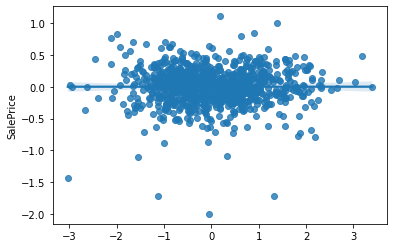

In [51]:
#plotting residual and y_train for linearity
res = (y_train - y_train_pred)
sns.regplot(y_train_pred,res)

<AxesSubplot:xlabel='SalePrice'>

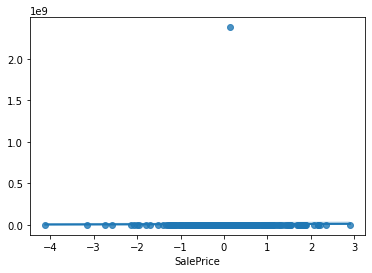

In [52]:
# Plotting y_test and y_test_pred to understand the spread (Homoscedacity)

fig = plt.figure()
sns.regplot(y_test, y_test_pred)

#### we can identify overfitting, so we will go with regularization

#### Ridge Regression

In [53]:
#ridge
ridge1 = Ridge(alpha=0.001)
ridge1.fit(X_train_rfe,y_train)

# train score
y_train_pred = ridge1.predict(X_train_rfe)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = ridge1.predict(X_test_rfe)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

#printing coeff of all columns
list(zip(X_train_rfe.columns,ridge1.coef_))

0.9179976935640579
0.8670180314942858


[('OverallQual', 0.19636163456609598),
 ('OverallCond', 0.1348022480257131),
 ('BsmtFinSF1', 0.10736039667950797),
 ('TotalBsmtSF', 0.13313353304212341),
 ('1stFlrSF', 0.30549006476431395),
 ('2ndFlrSF', 0.38794212029475483),
 ('GarageYrBlt', 0.02184569581013664),
 ('garage_age', -0.021845695697924283),
 ('selling_age', -0.23833551076272202),
 ('LotShape_IR2', 0.1533260065352501),
 ('LotConfig_FR2', -0.13350513829223148),
 ('Neighborhood_Crawfor', 0.36538888343405485),
 ('Neighborhood_Edwards', -0.15084993845696426),
 ('Neighborhood_MeadowV', -0.6338696427067759),
 ('Neighborhood_StoneBr', 0.2767640130048945),
 ('Condition1_Feedr', 0.23268185616118328),
 ('Condition1_Norm', 0.26413154775785863),
 ('Condition1_PosA', 0.249323962785284),
 ('Condition1_PosN', 0.19532839614660183),
 ('Condition1_RRAn', 0.2509790232405893),
 ('Condition1_RRNn', 0.22709006589094669),
 ('BldgType_Duplex', -0.3851052439212887),
 ('HouseStyle_2.5Fin', 0.24410034782982473),
 ('RoofStyle_Gambrel', 0.1486810050713

In [54]:
## list of alphas (lambda parameter): Ridge Regression Model

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000 ]}

ridge2 = Ridge()

##Cross-Validation

folds = 5
ridge_model = GridSearchCV(estimator = ridge2, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15,
                                   16, 17, 18, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
ridge_result = pd.DataFrame(ridge_model.cv_results_)
ridge_result.sort_values(by = ['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
10,0.011005,0.004921,0.001027,0.002054,0.8,{'alpha': 0.8},-0.204557,-0.188992,-0.218589,-0.236812,-0.246788,-0.219148,0.020969,1,-0.210878,-0.213719,-0.206639,-0.202570,-0.198815,-0.206524,0.005400
11,0.000537,0.001073,0.006134,0.007586,0.9,{'alpha': 0.9},-0.204458,-0.189160,-0.218567,-0.236701,-0.246876,-0.219152,0.020940,2,-0.211055,-0.213897,-0.206791,-0.202664,-0.198948,-0.206671,0.005425
12,0.012352,0.007409,0.003789,0.007577,1.0,{'alpha': 1.0},-0.204362,-0.189318,-0.218539,-0.236589,-0.246968,-0.219155,0.020914,3,-0.211225,-0.214068,-0.206990,-0.202756,-0.199076,-0.206823,0.005449
9,0.005170,0.006547,0.006988,0.008568,0.7,{'alpha': 0.7},-0.204665,-0.188813,-0.218761,-0.236920,-0.246701,-0.219172,0.021001,4,-0.210691,-0.213526,-0.206477,-0.202476,-0.198679,-0.206370,0.005370
8,0.012590,0.006426,0.000936,0.001261,0.6,{'alpha': 0.6},-0.204790,-0.188641,-0.218959,-0.237025,-0.246604,-0.219204,0.021025,5,-0.210492,-0.213316,-0.206299,-0.202380,-0.198546,-0.206207,0.005334
7,0.004927,0.003664,0.001614,0.003228,0.5,{'alpha': 0.5},-0.204919,-0.188461,-0.219180,-0.237127,-0.246494,-0.219236,0.021048,6,-0.210276,-0.213090,-0.206103,-0.202269,-0.198402,-0.206028,0.005295
6,0.006839,0.002066,0.006202,0.001379,0.4,{'alpha': 0.4},-0.205053,-0.188263,-0.219498,-0.237224,-0.246366,-0.219281,0.021072,7,-0.210053,-0.212869,-0.205885,-0.202140,-0.198261,-0.205842,0.005259
13,0.005748,0.003335,0.004311,0.003576,2.0,{'alpha': 2.0},-0.203745,-0.190655,-0.218209,-0.235692,-0.248234,-0.219307,0.020831,8,-0.212704,-0.215701,-0.208749,-0.203808,-0.200407,-0.208274,0.005601
5,0.008436,0.001585,0.004846,0.002995,0.3,{'alpha': 0.3},-0.205193,-0.188068,-0.219861,-0.237316,-0.246215,-0.219331,0.021089,9,-0.209814,-0.212667,-0.205640,-0.202004,-0.198111,-0.205647,0.005229
4,0.007128,0.001824,0.004859,0.001768,0.2,{'alpha': 0.2},-0.205357,-0.187829,-0.220300,-0.237450,-0.246244,-0.219436,0.021171,10,-0.209547,-0.212437,-0.205364,-0.201913,-0.197942,-0.205441,0.005186


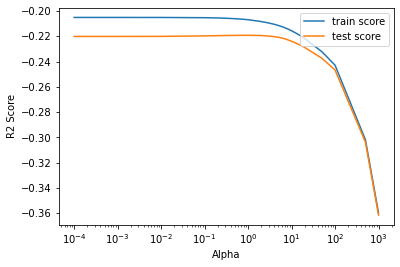

In [56]:
plt.plot(ridge_result['param_alpha'], ridge_result['mean_train_score'])
plt.plot(ridge_result['param_alpha'], ridge_result['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [57]:
# getting the best estimator for lambda

ridge_model.best_estimator_

Ridge(alpha=0.8)

In [58]:
print("Building a Model with", ridge_model.best_estimator_)

Building a Model with Ridge(alpha=0.8)


In [59]:
# Checking the coefficient values with lambda (alpha)

ridge = ridge_model.best_estimator_

ridge.fit(X_train_rfe, y_train)
print("Intercept: ", ridge.intercept_)
list(zip(X_train_rfe.columns,ridge1.coef_))

Intercept:  -0.33743688127076626


[('OverallQual', 0.19636163456609598),
 ('OverallCond', 0.1348022480257131),
 ('BsmtFinSF1', 0.10736039667950797),
 ('TotalBsmtSF', 0.13313353304212341),
 ('1stFlrSF', 0.30549006476431395),
 ('2ndFlrSF', 0.38794212029475483),
 ('GarageYrBlt', 0.02184569581013664),
 ('garage_age', -0.021845695697924283),
 ('selling_age', -0.23833551076272202),
 ('LotShape_IR2', 0.1533260065352501),
 ('LotConfig_FR2', -0.13350513829223148),
 ('Neighborhood_Crawfor', 0.36538888343405485),
 ('Neighborhood_Edwards', -0.15084993845696426),
 ('Neighborhood_MeadowV', -0.6338696427067759),
 ('Neighborhood_StoneBr', 0.2767640130048945),
 ('Condition1_Feedr', 0.23268185616118328),
 ('Condition1_Norm', 0.26413154775785863),
 ('Condition1_PosA', 0.249323962785284),
 ('Condition1_PosN', 0.19532839614660183),
 ('Condition1_RRAn', 0.2509790232405893),
 ('Condition1_RRNn', 0.22709006589094669),
 ('BldgType_Duplex', -0.3851052439212887),
 ('HouseStyle_2.5Fin', 0.24410034782982473),
 ('RoofStyle_Gambrel', 0.1486810050713

In [60]:
# predicting training set
y_train_pred = ridge.predict(X_train_rfe)

#predicting test set
y_test_pred  = ridge.predict(X_test_rfe)

In [61]:
##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_test_pred)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_train_pred)
MSE_lasso_test = mean_squared_error(y_test, y_test_pred)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("Regression Model",ridge ,":")
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nRMSE score:",RMSE_lasso_test,"\n")

Regression Model Ridge(alpha=0.8) :

For Train Set:
R2 score: 0.9174107805492033 
MSE score: 0.08258921945079668 
RMSE score: 0.2873834014879716

For Test Set:
R2 score: 0.8687753882586958 
MSE score: 0.12714453067688283 
RMSE score: 0.3565733173933277 



Model Evaluation of Ridge Regression model(Verifying assumptions of Linear regression)
- Linearity of the model
- Homoscedacity
- Error terms are independent of each other
- Error terms normal distribution
- Multicollineraity


#### 1. Linearity of the model

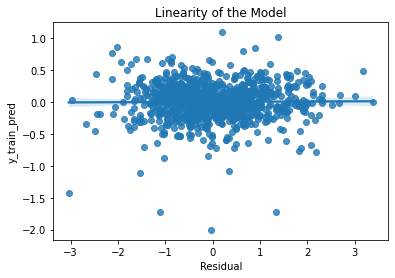

In [62]:
#plotting residual and y_train
res = (y_train - y_train_pred)
sns.regplot(y_train_pred,res)
plt.title("Linearity of the Model")
plt.ylabel("y_train_pred")
plt.xlabel("Residual")
plt.show()

The model is observed to be linear

#### 2. Homoscedacity

Text(0, 0.5, 'y_pred')

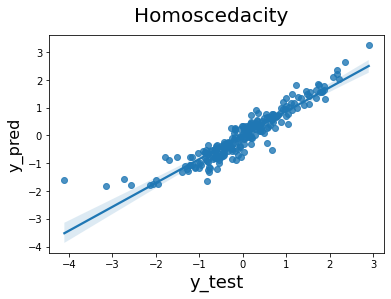

In [63]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
sns.regplot(y_test, y_test_pred)
fig.suptitle('Homoscedacity', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

#### 3. Error terms should be independent

Text(0, 0.5, 'Error Terms')

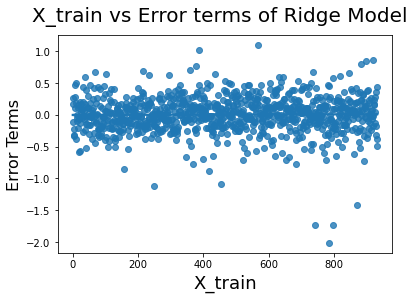

In [64]:
# Plotting y_test and y_test_pred to understand the spread o

fig = plt.figure()

#changing to 1D since Xtrain is not 1D
temp = [i for i in range(0,len(X_train_rfe),1)]

#plotting
sns.regplot(temp, res)
fig.suptitle('X_train vs Error terms of Ridge Model', fontsize = 20)              # Plot heading 
plt.xlabel('X_train', fontsize = 18)                          # X-label
plt.ylabel('Error Terms', fontsize = 16)

#### 4. Normal Distribution of error terms

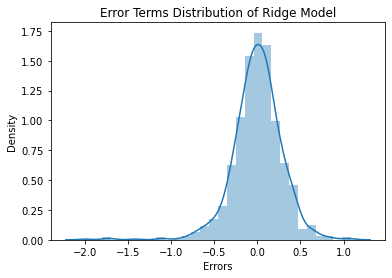

In [65]:
# Plot the histogram of the error terms
res = (y_train - y_train_pred)     #residuals
sns.distplot(res , bins = 30)
plt.title('Error Terms Distribution of Ridge Model')               
plt.xlabel('Errors') 
plt.show()

#### 5. Multicollinearity (AutoCorrelation check)

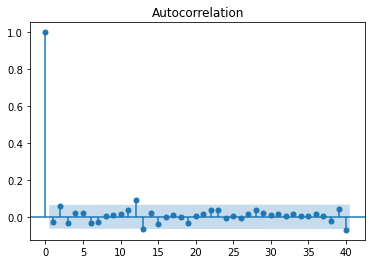

In [66]:
import statsmodels.tsa.api as smt
autocor = smt.graphics.plot_acf(res, lags=40 , alpha=0.05)
autocor.show()

All the Assumptions are verified

#### Top Features from Ridge

In [67]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Absolute value':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Absolute value', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  
top5_ridge = ridge_df.Features[0:5]
print('The Top 5 Features as per Ridge model is\n',top5_ridge)

#Dataframe rdige_df
ridge_df.head(10)

The Top 5 Features as per Ridge model is
 0      Exterior2nd_Brk Cmn
1      Exterior1st_BrkComm
2     Neighborhood_MeadowV
3    SaleCondition_Partial
4                 2ndFlrSF
Name: Features, dtype: object


,Features,Coefficient,Absolute value
0,Exterior2nd_Brk Cmn,-0.5767,0.5767
1,Exterior1st_BrkComm,-0.5767,0.5767
2,Neighborhood_MeadowV,-0.4937,0.4937
3,SaleCondition_Partial,0.3896,0.3896
4,2ndFlrSF,0.3862,0.3862
5,BldgType_Duplex,-0.3604,0.3604
6,Neighborhood_Crawfor,0.3597,0.3597
7,CentralAir_Y,0.3282,0.3282
8,KitchenQual_Fa,-0.3091,0.3091
9,1stFlrSF,0.3048,0.3048


#### Lasso Regression

In [68]:
#Lasso model
lasso1 = Lasso(alpha=0.001)
lasso1.fit(X_train,y_train)

# train score
y_train_pred = lasso1.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = lasso1.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))
print(len(lasso1.coef_))
#printing coeff of all columns
list(zip(X_train.columns,lasso1.coef_))

0.9343218725091461
0.8903239653895467
193


[('MSSubClass', -0.012145901181158434),
 ('LotFrontage', 0.017640955029521406),
 ('LotArea', 0.0675290067201009),
 ('OverallQual', 0.17900274793952406),
 ('OverallCond', 0.14282115921433977),
 ('MasVnrArea', 0.010889181702966844),
 ('BsmtFinSF1', 0.07723000150606948),
 ('BsmtFinSF2', 0.021451886358182525),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.09260870385059791),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0010347523492341395),
 ('LowQualFinSF', -0.015143430838668166),
 ('GrLivArea', 0.30977001805053206),
 ('BsmtFullBath', 0.02514706914952192),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.007674736717910234),
 ('HalfBath', 0.0016219756509458433),
 ('BedroomAbvGr', -0.0044700719079021),
 ('KitchenAbvGr', -0.03896942475844777),
 ('TotRmsAbvGrd', 0.030756836562729123),
 ('Fireplaces', 0.029095895443597093),
 ('GarageYrBlt', 0.011107848437062586),
 ('GarageCars', 0.0599219802335282),
 ('GarageArea', 0.01594764398997034),
 ('WoodDeckSF', 0.025103636973128132),
 ('OpenPorchSF', 0.028215369461864474),

In [69]:
# Gridsearch Operation on Training data set
##Lasso Regression Model. 
lasso2 = Lasso()

##List of alphas (lambda parameter)

params = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_cv = GridSearchCV(estimator = lasso2,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
lasso_result = pd.DataFrame(lasso_cv.cv_results_)
lasso_result.sort_values(by = ['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
9,0.143641,0.036422,0.003233,0.002092,0.001,{'alpha': 0.001},-0.187514,-0.186773,-0.206576,-0.221274,-0.228417,-0.206111,0.017015,1,-0.180931,-0.180549,-0.176417,-0.172829,-0.168354,-0.175816,0.004765
8,0.142559,0.024244,0.006882,0.004273,0.0009,{'alpha': 0.0009},-0.187821,-0.187565,-0.206109,-0.221690,-0.229302,-0.206497,0.017078,2,-0.179718,-0.179404,-0.175449,-0.171757,-0.166923,-0.174650,0.004837
10,0.114456,0.027720,0.005230,0.003930,0.002,{'alpha': 0.002},-0.187373,-0.187924,-0.209400,-0.221688,-0.226599,-0.206597,0.016456,3,-0.190309,-0.189255,-0.184788,-0.181938,-0.178207,-0.184899,0.004513
7,0.089023,0.024508,0.011621,0.006036,0.0008,{'alpha': 0.0008},-0.188322,-0.188273,-0.205697,-0.222193,-0.230282,-0.206953,0.017170,4,-0.178539,-0.178191,-0.174263,-0.170839,-0.165382,-0.173443,0.004918
6,0.077313,0.008239,0.003266,0.002535,0.0007,{'alpha': 0.0007},-0.189163,-0.189230,-0.205372,-0.222964,-0.230886,-0.207523,0.017091,5,-0.177348,-0.177109,-0.173054,-0.169951,-0.163520,-0.172196,0.005133
5,0.083994,0.016953,0.005179,0.005450,0.0006,{'alpha': 0.0006},-0.189951,-0.190430,-0.204925,-0.224236,-0.231518,-0.208212,0.017090,6,-0.175665,-0.175740,-0.171820,-0.168849,-0.161688,-0.170752,0.005214
4,0.098707,0.010236,0.006483,0.003248,0.0005,{'alpha': 0.0005},-0.191563,-0.192098,-0.204636,-0.224616,-0.232633,-0.209109,0.016800,7,-0.174003,-0.174147,-0.170004,-0.167605,-0.159802,-0.169112,0.005273
11,0.160765,0.031791,0.006091,0.003507,0.003,{'alpha': 0.003},-0.190970,-0.192478,-0.211437,-0.222194,-0.228651,-0.209146,0.015259,8,-0.195414,-0.195380,-0.190082,-0.187431,-0.183930,-0.190448,0.004488
3,0.136938,0.034896,0.001764,0.002163,0.0003,{'alpha': 0.0003},-0.196334,-0.196130,-0.204855,-0.224933,-0.237394,-0.211929,0.016495,9,-0.170108,-0.171181,-0.166858,-0.165233,-0.156237,-0.165924,0.005298
12,0.163950,0.013397,0.008957,0.005177,0.004,{'alpha': 0.004},-0.196692,-0.196506,-0.214750,-0.223158,-0.233326,-0.212886,0.014542,10,-0.200186,-0.200418,-0.194725,-0.193127,-0.188699,-0.195431,0.004441


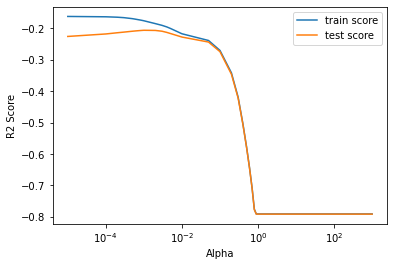

In [71]:
plt.plot(lasso_result['param_alpha'], lasso_result['mean_train_score'])
plt.plot(lasso_result['param_alpha'], lasso_result['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [72]:
# getting the best estimator for lambda

lasso_cv.best_estimator_

Lasso(alpha=0.001)

In [73]:
print("Building a Model with", lasso_cv.best_estimator_)

Building a Model with Lasso(alpha=0.001)


In [74]:
# check the coefficient values with lambda

lasso = lasso_cv.best_estimator_
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  -0.5155028054514524
Coefficients:
  [-1.21459012e-02  1.76409550e-02  6.75290067e-02  1.79002748e-01
  1.42821159e-01  1.08891817e-02  7.72300015e-02  2.14518864e-02
 -0.00000000e+00  9.26087039e-02  0.00000000e+00  1.03475235e-03
 -1.51434308e-02  3.09770018e-01  2.51470691e-02 -0.00000000e+00
  7.67473672e-03  1.62197565e-03 -4.47007191e-03 -3.89694248e-02
  3.07568366e-02  2.90958954e-02  1.11078484e-02  5.99219802e-02
  1.59476440e-02  2.51036370e-02  2.82153695e-02  2.19626369e-02
  1.37459251e-02  3.63227666e-02  1.26602815e-02  2.73258237e-04
 -6.24756690e-04 -4.36079295e-02 -2.65380141e-03 -1.84648749e-01
  2.26332732e-01  4.97550544e-02  9.55874401e-02 -0.00000000e+00
  3.94897151e-02 -0.00000000e+00  0.00000000e+00  1.39295489e-03
 -9.21094339e-03 -5.00107896e-02  2.48558296e-02 -6.12651870e-02
 -0.00000000e+00 -0.00000000e+00  9.07370359e-02  0.00000000e+00
 -0.00000000e+00  3.27680489e-01 -1.51736369e-01 -0.00000000e+00
 -0.00000000e+00 -3.31681431e-02 -8.609126

In [75]:
# predicting training set
y_train_pred = lasso.predict(X_train)

#predicting test set
y_test_pred  = lasso.predict(X_test)

In [76]:
##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_test_pred)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_train_pred)
MSE_lasso_test = mean_squared_error(y_test, y_test_pred)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("Regression Model",lasso,":")
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nRMSE score:",RMSE_lasso_test,"\n")

Regression Model Lasso(alpha=0.001) :

For Train Set:
R2 score: 0.9343218725091461 
MSE score: 0.06567812749085392 
RMSE score: 0.2562774424151566

For Test Set:
R2 score: 0.8903239653895467 
MSE score: 0.10626594936731987 
RMSE score: 0.32598458455472995 



Model Evaluation of Ridge Regression model(Verifying assumptions of Linear regression)
- Linearity of the model
- Homoscedacity
- Error terms are independent of each other
- Error terms normal distribution
- Multicollinearity 

#### 1. Linearity of the model

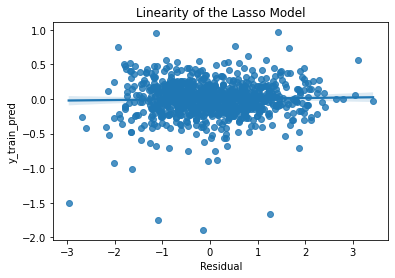

In [77]:
#plotting residual and y_train of Lasso
res = (y_train - y_train_pred)
sns.regplot(y_train_pred,res)
plt.title("Linearity of the Lasso Model")
plt.ylabel("y_train_pred")
plt.xlabel("Residual")
plt.show()

#### 2. Homoscedacity

Text(0, 0.5, 'y_pred')

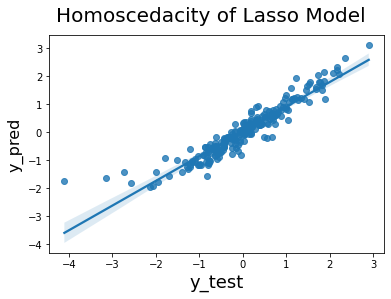

In [78]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
sns.regplot(y_test, y_test_pred)
fig.suptitle('Homoscedacity of Lasso Model', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

#### 3. Error terms are independent of each other

Text(0, 0.5, 'Error Terms')

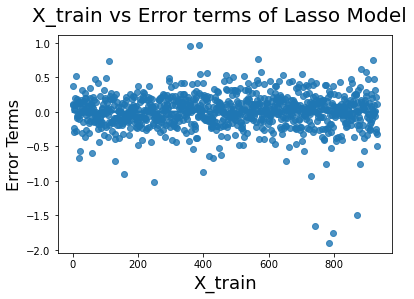

In [79]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()

#changing to 1D since Xtrain is not 1D
temp = [i for i in range(0,len(X_train),1)]

#plotting
sns.regplot(temp, res)
fig.suptitle('X_train vs Error terms of Lasso Model', fontsize = 20)              # Plot heading 
plt.xlabel('X_train', fontsize = 18)                          # X-label
plt.ylabel('Error Terms', fontsize = 16)

#### 4. Error terms normal distribution

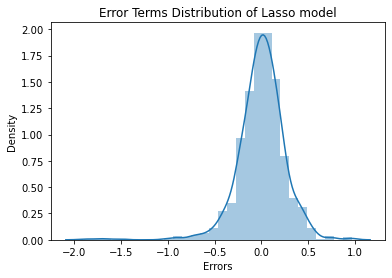

In [80]:
# Plot the histogram of the error terms
res = (y_train - y_train_pred)     #residuals
sns.distplot(res , bins = 30)
plt.title('Error Terms Distribution of Lasso model')               
plt.xlabel('Errors') 
plt.show()

#### 5. Multicollinearity

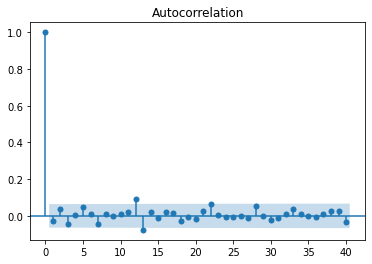

In [81]:
import statsmodels.tsa.api as smt
autocor = smt.graphics.plot_acf(res, lags=40 , alpha=0.05)
autocor.show()

#### Top Features from Lasso

In [82]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), 
                         'Absolute value':abs(lasso.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Absolute value', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)
top5_lasso = lasso_df.Features[0:5]
print('The Top 5 Features as per Lasso model is\n', top5_lasso)

#Dataframe lasso_df
lasso_df.head(10)

The Top 5 Features as per Lasso model is
 0      Exterior1st_BrkComm
1     Neighborhood_Crawfor
2     Neighborhood_StoneBr
3                GrLivArea
4    SaleCondition_Partial
Name: Features, dtype: object


,Features,Coefficient,Absolute value
0,Exterior1st_BrkComm,-0.4459,0.4459
1,Neighborhood_Crawfor,0.3277,0.3277
2,Neighborhood_StoneBr,0.3267,0.3267
3,GrLivArea,0.3098,0.3098
4,SaleCondition_Partial,0.2637,0.2637
5,MSZoning_FV,0.2263,0.2263
6,Exterior1st_BrkFace,0.2188,0.2188
7,CentralAir_Y,0.2103,0.2103
8,selling_age,-0.1846,0.1846
9,OverallQual,0.1790,0.1790


# Conclusion of Problem Statement Part - I

#### Top 10 Variables Significant in Predicting the house Price and their magnitude on how well they describe the price

#### Ridge Model:
    1) Exterior2nd_Brk Cmn:-0.5767
    2) Exterior1st_BrkComm:-0.5767
    3) Neighborhood_MeadowV:-0.4937
    4) SaleCondition_Partial:0.3896
    5) 2ndFlrSF:0.3862
    6) BldgType_Duplex:-0.3604
    7) Neighborhood_Crawfor:0.3597
    8) CentralAir_Y:0.3282
    9) KitchenQual_Fa:-0.3091
    10) 1stFlrSF:0.3048

#### Lasso Model:
    1) Exterior1st_BrkComm:  -0.4459
    2) Neighborhood_Crawfor:  0.3277
    3) Neighborhood_StoneBr:  0.3267
    4) GrLivArea:  0.3098
    5) SaleCondition_Partial:  0.2637
    6) MSZoning_FV:  0.2263
    7) Exterior1st_BrkFace:  0.2188
    8) CentralAir_Y:  0.2103 
    9) selling_age:  -0.1846 
    10) OverallQual:  0.1790

#### Optimal Value of Lambda for Ridge is,
Ridge : 0.8
- Regression Model Ridge(alpha=0.8) :

For Train Set:
- R2 score: 0.9174107805492033 
- MSE score: 0.08258921945079668 
- RMSE score: 0.2873834014879716

For Test Set:
- R2 score: 0.8687753882586958 
- MSE score: 0.12714453067688283 
- RMSE score: 0.3565733173933277 



#### Optimal Value of Lambda for Lasso is,

Lasso : 0.001
- Regression Model Lasso(alpha=0.001) :

For Train Set:
- R2 score: 0.9343218725091461 
- MSE score: 0.06567812749085392 
- RMSE score: 0.2562774424151566

For Test Set:
- R2 score: 0.8903239653895467 
- MSE score: 0.10626594936731987 
- RMSE score: 0.32598458455472995

#### Best model and model parameters
Lasso Seems to have better train and test R2 value,
- R2 Score for training data: 0.9343218725091461
- R2 score for Test data: 0.8903239653895467

# 4. Conclusion of Problem Statement Part - II

#### Doubled alpha rate:
#### Ridge Regression with doubled alpha rate (alpha=1.6)

In [83]:
##Checking the coefficient values with lambda (alpha) = 1.6

ridge = Ridge(alpha=1.6)

ridge.fit(X_train_rfe, y_train)

# predicting training set
y_train_pred = ridge.predict(X_train_rfe)

#predicting test set
y_test_pred  = ridge.predict(X_test_rfe)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_test_pred)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_train_pred)
MSE_lasso_test = mean_squared_error(y_test, y_test_pred)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("Ridge Regression Model with doubled alpha rate (alpha=1.6):")
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nRMSE score:",RMSE_lasso_test,"\n")

Ridge Regression Model with doubled alpha rate (alpha=1.6):

For Train Set:
R2 score: 0.9165677266249391 
MSE score: 0.08343227337506087 
RMSE score: 0.2888464529383404

For Test Set:
R2 score: 0.869602529301643 
MSE score: 0.12634310738963833 
RMSE score: 0.3554477562028467 



In [84]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Absolute value':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Absolute value', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)  #Top10

,Features,Coefficient,Absolute value
0,Exterior2nd_Brk Cmn,-0.4457,0.4457
1,Exterior1st_BrkComm,-0.4457,0.4457
2,Neighborhood_MeadowV,-0.4039,0.4039
3,2ndFlrSF,0.3849,0.3849
4,Neighborhood_Crawfor,0.3527,0.3527
5,BldgType_Duplex,-0.3393,0.3393
6,SaleCondition_Partial,0.3191,0.3191
7,CentralAir_Y,0.3143,0.3143
8,1stFlrSF,0.3040,0.3040
9,KitchenQual_Fa,-0.2840,0.2840


#### Doubled alpha rate:
#### Lasso Regression with doubled alpha rate (alpha=0.002)

In [85]:
# check the coefficient values with lambda = 0.002

lasso = Lasso(alpha=0.002)
        
lasso.fit(X_train, y_train) 

# predicting training set
y_train_pred = lasso.predict(X_train)

#predicting test set
y_test_pred  = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_test_pred)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_train_pred)
MSE_lasso_test = mean_squared_error(y_test, y_test_pred)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("Lasso Regression Model with doubled alpha rate (alpha=0.002):")
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nRMSE score:",RMSE_lasso_test,"\n")

Lasso Regression Model with doubled alpha rate (alpha=0.002):

For Train Set:
R2 score: 0.9280398141262559 
MSE score: 0.07196018587374407 
RMSE score: 0.26825395779698025

For Test Set:
R2 score: 0.8911927383138581 
MSE score: 0.1054241886315814 
RMSE score: 0.32469091245611015 



In [86]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), 
                         'Absolute value':abs(lasso.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Absolute value', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)

#Dataframe lasso_df
lasso_df.head(10)  #Top10

,Features,Coefficient,Absolute value
0,GrLivArea,0.3162,0.3162
1,Neighborhood_Crawfor,0.2935,0.2935
2,SaleCondition_Partial,0.2552,0.2552
3,Neighborhood_StoneBr,0.2260,0.2260
4,OverallQual,0.2008,0.2008
5,CentralAir_Y,0.1802,0.1802
6,Exterior1st_BrkFace,0.1751,0.1751
7,selling_age,-0.1725,0.1725
8,OverallCond,0.1433,0.1433
9,SaleCondition_Normal,0.1428,0.1428


#### Removing Top 5 features and Identifying the new potential top 5 features
#### Lasso Regression after removing top 5 features (alpha=0.001)

In [87]:
# removing top 5 features of Lasso regression from X_train and X_test
X_train = X_train.drop(top5_lasso,axis=1)
X_test = X_test.drop(top5_lasso,axis=1)

In [88]:
# check the coefficient values with lambda = 0.001

lasso = Lasso(alpha=0.001)
        
lasso.fit(X_train, y_train) 

# predicting training set
y_train_pred = lasso.predict(X_train)

#predicting test set
y_test_pred  = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_test_pred)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_train_pred)
MSE_lasso_test = mean_squared_error(y_test, y_test_pred)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("Lasso Regression Model (alpha=0.001):")
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nRMSE score:",RMSE_lasso_test,"\n")

Lasso Regression Model (alpha=0.001):

For Train Set:
R2 score: 0.9313485680800617 
MSE score: 0.06865143191993826 
RMSE score: 0.26201418266944687

For Test Set:
R2 score: 0.885782430358001 
MSE score: 0.11066627741917076 
RMSE score: 0.3326654136203082 



In [89]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), 
                         'Absolute value':abs(lasso.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Absolute value', ascending=False)
lasso_df.reset_index(drop=True, inplace=True) 
top5_lasso = lasso_df.Features[0:5]
print('The Top 5 Features as per Lasso model is\n',top5_lasso)

#Dataframe lasso_df
lasso_df.head(10)  #Top10

The Top 5 Features as per Lasso model is
 0     Exterior2nd_Brk Cmn
1                2ndFlrSF
2    Neighborhood_Edwards
3            SaleType_New
4                1stFlrSF
Name: Features, dtype: object


,Features,Coefficient,Absolute value
0,Exterior2nd_Brk Cmn,-0.4565,0.4565
1,2ndFlrSF,0.2944,0.2944
2,Neighborhood_Edwards,-0.2466,0.2466
3,SaleType_New,0.2396,0.2396
4,1stFlrSF,0.2376,0.2376
5,CentralAir_Y,0.2279,0.2279
6,Exterior1st_BrkFace,0.2144,0.2144
7,MSZoning_FV,0.2019,0.2019
8,OverallQual,0.1932,0.1932
9,selling_age,-0.1588,0.1588


After removing the top 5 features and building the Lasso model again, the new potential top 5 features are,
       
       1) Exterior1st_BrkComm: -0.4459
       2) Neighborhood_Crawfor: 0.3277
       3) Neighborhood_StoneBr: 0.3267
       4) GrLivArea: 0.3098
       5) SaleCondition_Partial: 0.2637